# Prediksi tingkat churn klien Interconnect

## Pendahuluan<a id='intro'></a>

Operator telekomunikasi bernama Interconnect ingin meramalkan tingkat churn klien mereka.󠀲󠀡󠀠󠀥󠀨󠀣󠀤󠀡󠀳󠀰 Jika diketahui bahwa seorang klien berencana untuk berhenti, klien tersebut akan ditawari kode promosi dan opsi paket khusus.󠀲󠀡󠀠󠀥󠀨󠀣󠀤󠀢󠀳󠀰 Tim pemasaran Interconnect telah mengumpulkan beberapa data pribadi klien, termasuk informasi tentang paket data yang dipilih dan kontrak mereka.


Layanan Interconnect
󠀰Interconnect menyediakan dua jenis layanan utama:
- Jaringan telepon rumah.󠀲󠀡󠀠󠀥󠀨󠀣󠀤󠀦󠀳󠀰 Telepon bisa disambungkan ke beberapa saluran secara bersamaan.
- Internet.󠀲󠀡󠀠󠀥󠀨󠀣󠀤󠀨󠀳󠀰 Jaringan internet dapat diatur melalui saluran telepon (DSL, digital subscriber line) atau melalui kabel serat optik.
󠀰

Beberapa layanan lain yang disediakan Interconnect meliputi:
- Keamanan Internet: perangkat lunak antivirus (DeviceProtection) dan pemblokir situs web berbahaya (OnlineSecurity)
- Jalur dukungan teknis khusus (TechSupport)
- Penyimpanan cloud untuk file dan backup data (OnlineBackup)
- Streaming TV (StreamingTV) dan direktori film (StreamingMovies)


Klien dapat memilih untuk melakukan pembayaran secara bulanan atau menandatangani kontrak untuk berlangganan selama 1 atau 2 tahun.󠀲󠀡󠀠󠀥󠀨󠀣󠀥󠀥󠀳󠀰 Mereka bisa menggunakan beragam metode pembayaran dan menerima tagihan elektronik setelah melakukan transaksi.


Deskripsi Data
󠀰Data yang tersedia terdiri dari beberapa file yang didapat dari sumber berbeda:
- contract.csv — 󠀰informasi kontrak
- personal.csv — 󠀰data personal klien
- internet.csv — informasi tentang layanan Internet
- phone.csv — informasi tentang layanan telepon

Pada setiap file, ada kolom customerID dengan kode unik yang ditetapkan untuk setiap klien. Informasi kontrak berlaku per tanggal 1 Februari 2020.


## Konten<a id='back'></a>

* [Pendahuluan](#intro)
* [Tahap 1. Inisialisasi data](#inisial)
* [Tahap 2. Mempersiapkan data](#prepare)
* [Tahap 3. Analisis Data](#analyze)
* [Tahap 4. Melatih Model](#train)
* [Kesimpulan Umum](#conclusion)
    * [Temuan](#end)
    * [Rekomendasi](#recom)

[Kembali](#back)


## Inisialisasi Data<a id='inisial'></a>

In [1]:
#memuat semua library yang dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import joblib
from datetime import datetime
from joblib import dump

from sklearn.preprocessing import OrdinalEncoder

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform, randint
from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

## Mempersiapkan data<a id='prepare'></a>

In [3]:
#memuat semua file
contract = pd.read_csv('contract.csv')
personal = pd.read_csv('personal.csv')
internet = pd.read_csv('internet.csv')
phone = pd.read_csv('phone.csv')

### Memeriksa file `contract`

In [4]:
#memeriksa file
contract.head(10)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.5
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.9
8,7892-POOKP,2017-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,104.80,3046.05
9,6388-TABGU,2014-12-01,No,One year,No,Bank transfer (automatic),56.15,3487.95


In [5]:
#memeriksa informasi umum
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


terlihat bahwa dataset `contract` memiliki `7043` entry dan 8 kolom:
- `customerID` - ID customer
- `BeginDate` - tanggal mulai berlangganan
- `EndDate` - tanggal berhenti berlangganan
- `Type` - tipe langganan
- `PaperlessBilling` - metode bayar tanpa struk
- `PaymentMethod` - metode pembayaran
- `MonthlyCharges` - pembayaran tiap bulan
- `TotalCharges` - total pembayaran

terlihat bahwa tidak ada dataset yang memiliki nilai hilang, akan tetapi memiliki judul kolom yang besar kecil, sehingga harus disamakan menjadi kecil, dan mengganti tipe data kolom.

In [6]:
# Mengubah judul kolom menjadi kecil semua
contract.columns = contract.columns.str.lower()
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   begindate         7043 non-null   object 
 2   enddate           7043 non-null   object 
 3   type              7043 non-null   object 
 4   paperlessbilling  7043 non-null   object 
 5   paymentmethod     7043 non-null   object 
 6   monthlycharges    7043 non-null   float64
 7   totalcharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


sekarang semuajudul kolom sudah kecil semua, sebelum mengganti tipe data mari kita cek duplikasi

In [7]:
#memeriksa duplikat
contract.duplicated().sum()

0

dataset tidak memiliki duplikasi data. mari sekarang kita periksa kolom yang memiliki tipe data yang salah

In [8]:
sorted_contract = contract.sort_values(by='begindate')
sorted_contract['begindate']

4513    2013-10-01
4610    2013-10-01
3439    2013-10-01
975     2013-11-01
3040    2013-11-01
           ...    
3331    2020-02-01
6670    2020-02-01
936     2020-02-01
3826    2020-02-01
6754    2020-02-01
Name: begindate, Length: 7043, dtype: object

terlihat bahwa tanggal mulainya dataset ini mendata orang yang berlangganan adalah `2013-10-01` - `2020-02-01`, seperti yang kita ketahui informasi kontrak berlaku per tanggal 1 Februari 2020.

In [9]:
contract['begindate'].value_counts()

2014-02-01    366
2019-09-01    237
2019-10-01    237
2019-11-01    237
2020-01-01    233
             ... 
2020-02-01     11
2014-01-01      7
2013-10-01      3
2013-12-01      3
2013-11-01      2
Name: begindate, Length: 77, dtype: int64

sepertinya kolom ini sudah memiliki struktur yang benar, sekarang kita hanya perlu mengganti tipe datanya menjadi `datetime`. sebelum itu mari kita periksa kolom `enddate`

In [10]:
contract['enddate'].value_counts()

No                     5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: enddate, dtype: int64

terlihat bahwa ada sebanyak `5174` orang yang masih berlangganan. akan tetapi ini menyebabkan struktur tanggalnya salah sehingga tidak bisa diubah langsung tipe datanya

In [11]:
contract['totalcharges'].value_counts()

20.2       11
           11
19.75       9
20.05       8
19.65       8
           ..
559.2       1
937.5       1
2440.15     1
761.85      1
736.8       1
Name: totalcharges, Length: 6531, dtype: int64

terlihat bahwa kolom `totalcharges` memiliki `string kosong` sehingga harus diganti terlebih dahulu

In [12]:
# Mengecek Nilai Total Charge yang berupa string kosong
contract[contract['totalcharges'] == ' ']['totalcharges'].count()

11

In [13]:
#Merubah string kosong pada kolom total charges menjadi 0
contract.loc[contract['totalcharges'] == ' ','totalcharges'] = 0

mari kita periksa kolom tersebut

In [14]:
# Melihat nilai Total Charges yang sama dengan nol
totalcharges_null = contract[contract['totalcharges'] == 0]
print(totalcharges_null['totalcharges'].count())
totalcharges_null

11


,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,0
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,0
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,0
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,0
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,0
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,0
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,0
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,0
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,0
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,0


terlihat bahwa setiap kolom yang tadinya string kosong sudah berisikan nilai `0` terlihat bahwa yang memiliki `totalcharges` nol adalah orang yang baru berlangganan `begindate` sehingga akumulasi pembayarannya belum dapat dihitung.

sekarang kita bisa mengganti tipe data pada kolom `begindate` dan `totalcharges`

In [15]:
#mengganti tipe data
contract['begindate'] = pd.to_datetime(contract['begindate'])
contract['totalcharges'] = contract['totalcharges'].astype('float')

contract.dtypes

customerid                  object
begindate           datetime64[ns]
enddate                     object
type                        object
paperlessbilling            object
paymentmethod               object
monthlycharges             float64
totalcharges               float64
dtype: object

sekarang mari kita periksa setiap kolom secara menyeluruh

In [16]:
#informasi umum tambahan
contract.describe()

,monthlycharges,totalcharges
count,7043.000000,7043.000000
mean,64.761692,2279.734304
std,30.090047,2266.794470
min,18.250000,0.000000
25%,35.500000,398.550000
50%,70.350000,1394.550000
75%,89.850000,3786.600000
max,118.750000,8684.800000


terlihat bahwa kolom numerik hanya berada pada kolom `monthlycharges` dan `totalcharges` dengan nilai `mean` pada `monthlycharge` adalah `64.761` dan `totalcharges` adalah `2279.734` dan nilai `median` pada `monthlycharge` adalah `70.35` dan `totalcharges` adalah `1394.55`. melihat selisih ini diperkirakan bahwa kolom `monthlycharges` tidak memiliki terlalu banyak outliers karna nilai `mean` dan `median` yang hampir sama sedangkan kolom `totalcharges` memiliki outliers yang cukup banyak.

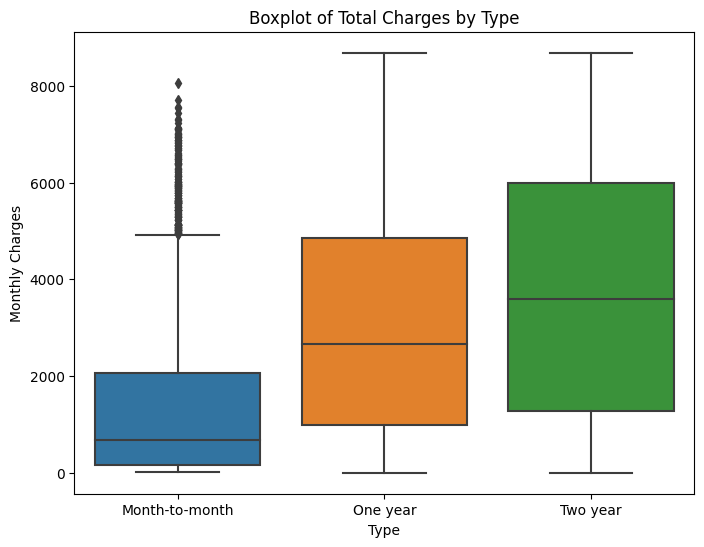

In [17]:
# Membuat boxplot kolom total charges
plt.figure(figsize=(8, 6))
sns.boxplot(x='type', y='totalcharges', data=contract)
plt.title('Boxplot of Total Charges by Type')
plt.xlabel('Type')
plt.ylabel('Monthly Charges')
plt.show()

terlihat bahwa banyak outliers pada kolom ini tertutama pada `type` `month-to-month`

**Kesimpulan:** dataset `contract` memiliki `7043` entry dan 8 kolom, terlihat bahwa kolom memiliki judul yang besar kecil sehingga harus diperbaiki menjadi kecil semua, serta ada beberapa kolom yang memiliki tipe data sayang salah dan `string kosong` sehingga harus diganti terlebih dahulu.

### Memeriksa file `personal`

In [18]:
#memeriksa file
personal.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
5,9305-CDSKC,Female,0,No,No
6,1452-KIOVK,Male,0,No,Yes
7,6713-OKOMC,Female,0,No,No
8,7892-POOKP,Female,0,Yes,No
9,6388-TABGU,Male,0,No,Yes


In [19]:
#memeriksa informasi umum
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


terlihat bahwa dataset `personal` memiliki `7043` entry dan 5 kolom:
- `customerID` - ID customer
- `gender` - jenis kelamin pelanggan
- `SeniorCitizen` - informasi umur pelanggan (senior>60 tahun) (1/Ya dan 0/Tidak)
- `Partner` - pasangan (Yes dan No)
- `Dependents` - pelanggan memiliki tanggungan (Yes dan No)

terlihat bahwa tidak ada dataset yang memiliki nilai hilang, akan tetapi memiliki judul kolom yang besar kecil, sehingga harus disamakan menjadi kecil.

In [20]:
# Mengubah judul kolom menjadi kecil semua
personal.columns = personal.columns.str.lower()
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerid     7043 non-null   object
 1   gender         7043 non-null   object
 2   seniorcitizen  7043 non-null   int64 
 3   partner        7043 non-null   object
 4   dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


sekarang judul kolom sudah menjadi kecil semua

In [21]:
#memeriksa duplikat
personal.duplicated().sum()

0

tidak ditemukan adanya duplikasi data.

In [22]:
#memeriksa kolom gender
personal['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

terlihat bahwa data ini cukup seimbang antara laki-laki dan perempuan, yaitu laki-laki `3555` orang dan perempuan `3488` orang

In [23]:
#memeriksa kolom seniorcitizen
personal['seniorcitizen'].value_counts()

0    5901
1    1142
Name: seniorcitizen, dtype: int64

terlihat bahwa data ini tidak setimbang, hanya sedikit warga senior yang terlihat menggunakan provider ini dibandingkan bukan warga senior

In [24]:
#memeriksa kolom partner
personal['partner'].value_counts()

No     3641
Yes    3402
Name: partner, dtype: int64

terlihat bahwa informasi partner cukup seimbang antara yang memiliki partner dan tidak

In [25]:
#memeriksa kolom dependents
personal['dependents'].value_counts()

No     4933
Yes    2110
Name: dependents, dtype: int64

terlihat bahwa data pada tanggungan terlihat tidak seimbang dimana lebih banyak orang yang tidak memiliki tanggungan yang berlangganan provider ini.

**Kesimpulan:** dataset `personal` memiliki `7043` entry dan 5 kolom, tidak ada nilai hilang dan duplikasi data. judul kolom besar kecil sehingga diubah terlebih dahulu menjadi kecil semua, terlihat bahwa kolom-kolom yang terdapat pada dataset ini berisikan informasi dengan jawaban `ya` dan `tidak`, sehingga tidak terlalu berpengaruh tipe datanya dapat berupa object `yes` dan `no` ataupun `1` dan `0`. terdapat 2 kolom yang memiliki variasi nilai yang cukup seimbang yaitu kolom `gender` dan `partner` sedangan 2 kolom lainnya tidak cukup seimbang.

### Memeriksa file `internet`

In [26]:
#memeriksa file
internet.head(10)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,DSL,Yes,No,No,No,No,No
8,7892-POOKP,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,DSL,Yes,Yes,No,No,No,No


In [27]:
#memeriksa informasi umum
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


terlihat bahwa dataset `internet` memiliki `5517` entry dan 8 kolom:
- `customerID` - ID customer
- `InternetService` - jenis layanan internet
- `OnlineSecurity` - langganan security online
- `OnlineBackup` - layanan backup online
- `DeviceProtection` - layanan proteksi device
- `TechSupport` - layanan dukungan teknis
- `StreamingTV` - layangan streaming tv
- `StreamingMovies` - layanan streaming film

terlihat bahwa tidak ada dataset yang memiliki nilai hilang, akan tetapi memiliki judul kolom yang besar kecil, sehingga harus disamakan menjadi kecil.

In [28]:
# Mengubah judul kolom menjadi kecil semua
internet.columns = internet.columns.str.lower()
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerid        5517 non-null   object
 1   internetservice   5517 non-null   object
 2   onlinesecurity    5517 non-null   object
 3   onlinebackup      5517 non-null   object
 4   deviceprotection  5517 non-null   object
 5   techsupport       5517 non-null   object
 6   streamingtv       5517 non-null   object
 7   streamingmovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [29]:
#memeriksa kolom internetservice
internet['internetservice'].value_counts()

Fiber optic    3096
DSL            2421
Name: internetservice, dtype: int64

terlihat bahwa kolom ini memiliki informasi tetntang jenis kabel yang digunakan, yaitu fiber optik dan dsl

In [30]:
#memeriksa kolom onlinesecurity
internet['onlinesecurity'].value_counts()

No     3498
Yes    2019
Name: onlinesecurity, dtype: int64

kolom ini berisikan informasi bahwa sebanyak `2019` orang sudah menggunakan `onlinesecurity`

In [31]:
#memeriksa kolom onlinebackup
internet['onlinebackup'].value_counts()

No     3088
Yes    2429
Name: onlinebackup, dtype: int64

terlihat bahwa masih banyak yang belum menggunakan `onlinebackup` untuk data mereka

In [32]:
#memeriksa kolom deviceprotection
internet['deviceprotection'].value_counts()

No     3095
Yes    2422
Name: deviceprotection, dtype: int64

terlihat bahwa masih banyak yang belum menggunakan `deviceprotection` untuk device mereka

In [33]:
#memeriksa kolom techsupport
internet['techsupport'].value_counts()

No     3473
Yes    2044
Name: techsupport, dtype: int64

disini terlihat hanya sebanyak `2044` orang yang sudah menggunakan `techsupport`

In [34]:
#memeriksa kolom streamingtv
internet['streamingtv'].value_counts()

No     2810
Yes    2707
Name: streamingtv, dtype: int64

terlihat bahwa secara kesuluruhan pengguna `streamingtv` dan tidak memiliki nilai yang cukup seimbang

In [35]:
#memeriksa kolom streamingmovies
internet['streamingmovies'].value_counts()

No     2785
Yes    2732
Name: streamingmovies, dtype: int64

terlihat bahwa secara keseluruhan pengguna `streamingmovies` dan yang tidak memiliki nilai yang sangat seimbang

**Kesimpulan:** dataset `internet` memiliki `5517` entry dan 8 kolom, tidak ada nilai hilang dan duplikasi data, akan tetapi judul kolom masih merupakan besar kecil sehingga harus diganti. dataset ini berisikan informasi layanan yang digunakan maupun tidak. dilihat dari informasi ini dapat dipastikan bahwa pengguna provider ini lebih mengdepankan entertainment dibandingkan dengan layanan perawatan ataupun keamanan device mereka, dilihat dari cukup banyaknya yang masih belum menggunakan pelayanan tersebut secara optimal.

### Memeriksa file `phone`

In [36]:
#memeriksa file
phone.head(10)

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
5,7892-POOKP,Yes
6,6388-TABGU,No
7,9763-GRSKD,No
8,7469-LKBCI,No
9,8091-TTVAX,Yes


In [37]:
#memeriksa informasi umum
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


terlihat bahwa dataset `phone` memiliki `6361` entry dan 2 kolom:
- `customerID` - ID customer
- `MultipleLines` - layanan multiple lines

terlihat bahwa tidak ada dataset yang memiliki nilai hilang, akan tetapi memiliki judul kolom yang besar kecil, sehingga harus disamakan menjadi kecil.

In [38]:
# Mengubah judul kolom menjadi kecil semua
phone.columns = phone.columns.str.lower()
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerid     6361 non-null   object
 1   multiplelines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [39]:
#memeriksa kolom multiplelines
phone['multiplelines'].value_counts()

No     3390
Yes    2971
Name: multiplelines, dtype: int64

terlihat disini bahwa cukup banyak yang menggunakan layanan `multiplelines` ini yaitu sebanyak `2971` orang.

**Kesimpulan:** dataset `phone` memiliki `6361` entry dan 2 kolom, cukup banyak pengguna layanan `multiplelines` ini yaitu sebanyak `2971` orang. yang mengartikan bahwa cukup banyak orang yang menggunakan provider untuk memungkinkan pelanggan untuk memiliki lebih dari satu saluran telepon yang terhubung ke satu nomor telepon rumah atau bisnis. Dengan layanan ini, pelanggan dapat melakukan atau menerima beberapa panggilan secara bersamaan menggunakan saluran telepon yang berbeda.

**Kesimpulan Umum:**
1. dataset `contract` memiliki `7043` entry dan 8 kolom, terdapat tipe data `float`, `object` dan `datetime`. terdapat 2 kolom numerik `monthlycharges` dan `totalcharges`. kolom `enddate` masih memiliki tipe data yang salah.
2. dataset `personal` memiliki `7043` entry dan 5 kolom, terdapat tipe data `int` dan `object`. tipe data integer ini sebenarnya bisa diganti menjadi object, ataupun sebaliknya karena hanya mengandung 2 indikator yes dan no
3. dataset `internet` memiliki `5517` entry dan 8 kolom, terdapat tipe data `object`. ini sudah seragam karena mengandung nilai yes dan no
4. dataset `phone` memiliki `6361` entry dan 2 kolom, terdapat tipe data `object`. ini sudah seragam karena mengandung nilai yes dan no

## Analisis Data<a id='analyze'></a>

sekarang dataset sudah lengkap dan seragam mari kita gabungkan semua dataset ke dalam 1 dataset

In [40]:
#menggabungkan semua dataset
merged_data = pd.merge(contract, internet, on='customerid', how='left')
merged_data = pd.merge(merged_data, personal, on='customerid', how='left')
df_all = pd.merge(merged_data, phone, on='customerid', how='left')
df_all.head(5)

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,gender,seniorcitizen,partner,dependents,multiplelines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,No,No,No,Female,0,No,No,No


In [41]:
#memeriksa informasi
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7043 non-null   object        
 1   begindate         7043 non-null   datetime64[ns]
 2   enddate           7043 non-null   object        
 3   type              7043 non-null   object        
 4   paperlessbilling  7043 non-null   object        
 5   paymentmethod     7043 non-null   object        
 6   monthlycharges    7043 non-null   float64       
 7   totalcharges      7043 non-null   float64       
 8   internetservice   5517 non-null   object        
 9   onlinesecurity    5517 non-null   object        
 10  onlinebackup      5517 non-null   object        
 11  deviceprotection  5517 non-null   object        
 12  techsupport       5517 non-null   object        
 13  streamingtv       5517 non-null   object        
 14  streamingmovies   5517 n

setelah menggabungkan semua dataset menjadi 1 dataset, sekarang kita memiliki dataset dengan total data `7043` dan kolom sebanyak 20. terlihat bahwa ada beberapa nilai hilang pada kolom, sehingga harus di bersihkan terlebih dahulu.

In [42]:
#memeriksa nilai hilang
df_all.isna().sum().sort_values(ascending=False)

onlinebackup        1526
internetservice     1526
streamingmovies     1526
streamingtv         1526
techsupport         1526
deviceprotection    1526
onlinesecurity      1526
multiplelines        682
totalcharges           0
monthlycharges         0
begindate              0
paymentmethod          0
paperlessbilling       0
type                   0
enddate                0
gender                 0
seniorcitizen          0
partner                0
dependents             0
customerid             0
dtype: int64

In [43]:
#fungsi persentase missing values
def missing_values_percentage(df):
    missing_percentage = df.isna().sum().sort_values(ascending=False) / len(df) * 100
    return missing_percentage

#persentase missing values pada dataset
miss_value = missing_values_percentage(df_all)
miss_value.head(10)

onlinebackup        21.666903
internetservice     21.666903
streamingmovies     21.666903
streamingtv         21.666903
techsupport         21.666903
deviceprotection    21.666903
onlinesecurity      21.666903
multiplelines        9.683374
totalcharges         0.000000
monthlycharges       0.000000
dtype: float64

terlihat bahwa kolom yang hilang memiliki tipe data `kategorik` `yes` dan `no` sekarang mari kita isikan nilainya `no` dengan anggapan customer tidak menggunakan layanan.

In [44]:
#mengisi nilai hilang
df_all = df_all.fillna('No')
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7043 non-null   object        
 1   begindate         7043 non-null   datetime64[ns]
 2   enddate           7043 non-null   object        
 3   type              7043 non-null   object        
 4   paperlessbilling  7043 non-null   object        
 5   paymentmethod     7043 non-null   object        
 6   monthlycharges    7043 non-null   float64       
 7   totalcharges      7043 non-null   float64       
 8   internetservice   7043 non-null   object        
 9   onlinesecurity    7043 non-null   object        
 10  onlinebackup      7043 non-null   object        
 11  deviceprotection  7043 non-null   object        
 12  techsupport       7043 non-null   object        
 13  streamingtv       7043 non-null   object        
 14  streamingmovies   7043 n

sekarang kita sudah melihat bahwa semua dataset sudah terisi dengan penuh

sekarang mari kita bandingkan pelanggan yang masih berlangganan dan yang sudah tidak berlangganan

In [45]:
#menambahkan kolom "status" untuk variabel target dengan 0 untuk pelanggan aktif dan 1 untuk yang berhenti
df_all['status'] = df_all['enddate'].apply(lambda x: 0 if x == "No" else 1)
df_all['status'].value_counts()

0    5174
1    1869
Name: status, dtype: int64

membuat kolom `enddate` pada dataset menjadi tipe data `datetime`

In [46]:
#Merubah nilai No pada kolom EndDate menjadi tanggal 2020-02-01 karena kontrak diberlakukan tanggal 1 Feb 2020
df_all.loc[df_all['enddate'] == 'No','enddate'] = '2020-02-01 00:00:00'

df_all['enddate'] = pd.to_datetime(df_all['enddate'])
df_all.dtypes

customerid                  object
begindate           datetime64[ns]
enddate             datetime64[ns]
type                        object
paperlessbilling            object
paymentmethod               object
monthlycharges             float64
totalcharges               float64
internetservice             object
onlinesecurity              object
onlinebackup                object
deviceprotection            object
techsupport                 object
streamingtv                 object
streamingmovies             object
gender                      object
seniorcitizen                int64
partner                     object
dependents                  object
multiplelines               object
status                       int64
dtype: object

sekarang kolom `enddates` sudah terisi semua. sekarang mari kita tambahkan informasi baru terkait sudah berapa lamanya pelanggan berlangganan

In [47]:
# Menambahkan kolom baru untuk melihat durasi lamanya pelanggan berlangganan
df_all['term'] = (df_all['enddate'].dt.to_period('D') - df_all['begindate'].dt.to_period('D')).apply(lambda x: x.n)
df_all

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,internetservice,onlinesecurity,...,techsupport,streamingtv,streamingmovies,gender,seniorcitizen,partner,dependents,multiplelines,status,term
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,...,No,No,No,Female,0,Yes,No,No,0,31
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.50,DSL,Yes,...,No,No,No,Male,0,No,No,No,0,1036
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,...,No,No,No,Male,0,No,No,No,1,61
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,...,Yes,No,No,Male,0,No,No,No,0,1371
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,...,No,No,No,Female,0,No,No,No,1,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,2020-02-01,One year,Yes,Mailed check,84.80,1990.50,DSL,Yes,...,Yes,Yes,Yes,Male,0,Yes,Yes,Yes,0,730
7039,2234-XADUH,2014-02-01,2020-02-01,One year,Yes,Credit card (automatic),103.20,7362.90,Fiber optic,No,...,No,Yes,Yes,Female,0,Yes,Yes,Yes,0,2191
7040,4801-JZAZL,2019-03-01,2020-02-01,Month-to-month,Yes,Electronic check,29.60,346.45,DSL,Yes,...,No,No,No,Female,0,Yes,Yes,No,0,337
7041,8361-LTMKD,2019-07-01,2019-11-01,Month-to-month,Yes,Mailed check,74.40,306.60,Fiber optic,No,...,No,No,No,Male,1,Yes,No,Yes,1,123


### Memeriksa distribusi kolom `tenure`

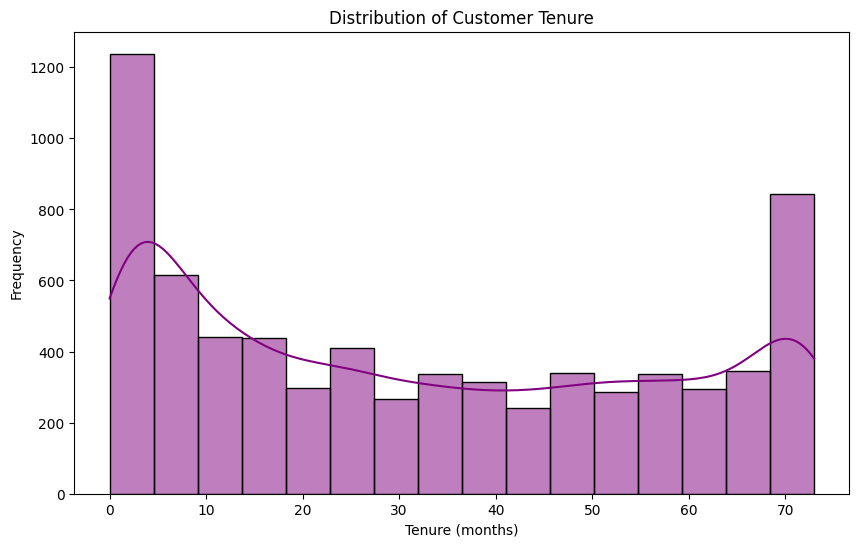

In [48]:
# Create a new feature 'tenure' in months
df_all['tenure'] = (df_all['enddate'] - df_all['begindate']).dt.days // 30

plt.figure(figsize=(10, 6))
sns.histplot(df_all['tenure'], kde=True, color='purple')
plt.title('Distribution of Customer Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.show()

terlihat cukup banyak pelanggan yang baru menggunakan provider ini, dan cukup banyak pula yang menggunakan provider ini >5 tahun

### Memeriksa distribusi kolom `type`

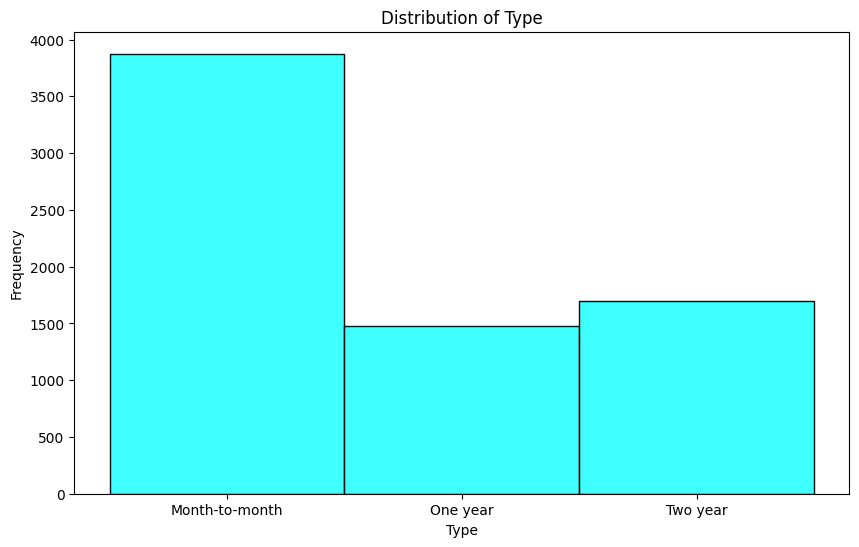

In [49]:
#melihat distribusi kolom type
plt.figure(figsize=(10, 6))
sns.histplot(df_all['type'], kde=False, color='cyan')
plt.title('Distribution of Type')
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.show()

terlihat bahwa lebih banyak pelanggan memilih untuk berlangganan paket `month-to-month` kemungkinan ini dikarenakan harganya yang lebih murah dan lebih ekonomis untuk bisa dibeli ataupun tidak bulan selanjutnya.

### Memeriksa distribusi kolom `paymentmethod`

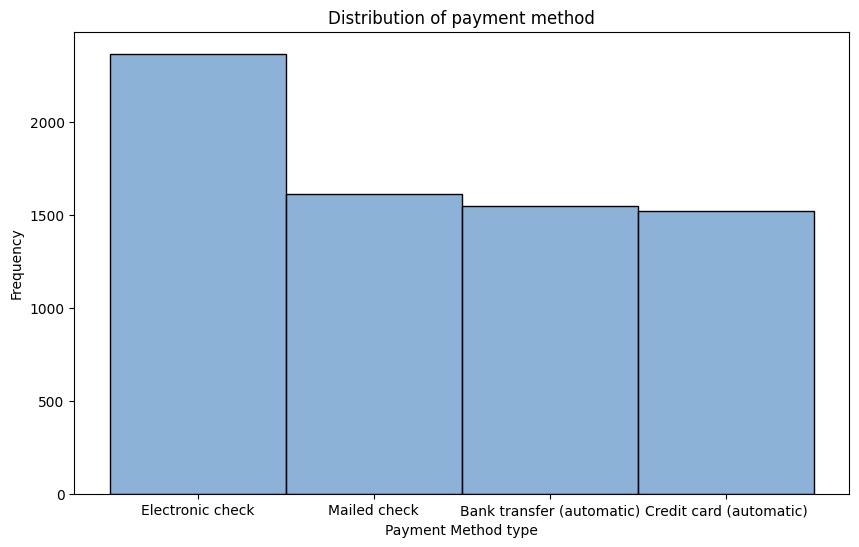

In [50]:
#melihat distribusi kolom paymentmethod
plt.figure(figsize=(10, 6))
sns.histplot(df_all['paymentmethod'], kde=False, color='#6699CC')
plt.title('Distribution of payment method')
plt.xlabel('Payment Method type')
plt.ylabel('Frequency')
plt.show()

terlihat bahwa lebih banyak yang menggunakan metode pembayaran `electronic check` kemungkinan dikarenakan kemudahan dan apabila terjadi keterlambatan masih tetap bisa dilakukan pembayaran. berbeda dengan yang diprogram automatic yang jika saldo tidak mencukupi makan pengguna tidak menyadarinya dan lebih merepotkan karena mereka harus tetap membayar ulang untuk selanjutnya, ditambah dengan lebih banyaknya pengguna `month-to-month` maka metode pembayaran ini justru lebih mudah diberlakukan.

### Memeriksa distribusi kolom `internetservice`

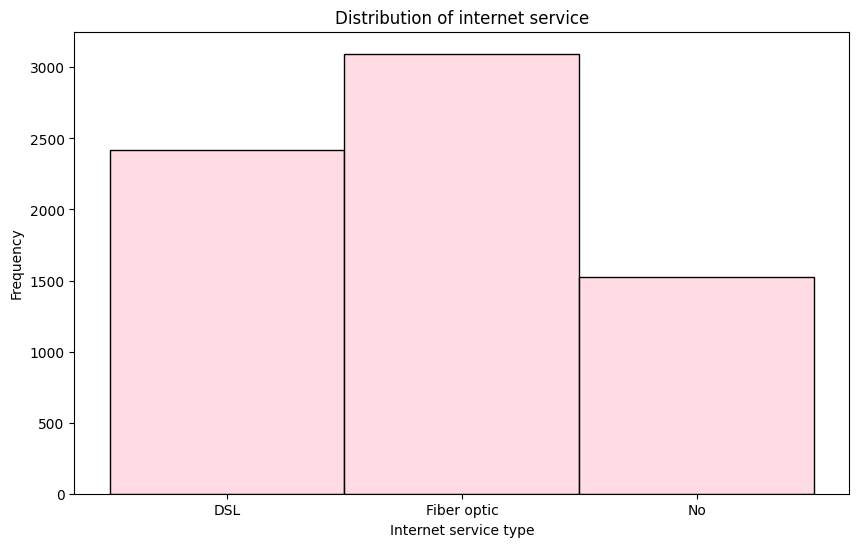

In [51]:
#melihat distribusi kolom internet service
plt.figure(figsize=(10, 6))
sns.histplot(df_all['internetservice'], kde=False, color='#FFD1DC')
plt.title('Distribution of internet service')
plt.xlabel('Internet service type')
plt.ylabel('Frequency')
plt.show()

terlihat bahwa lebih banyak yang menggunakan kabel `fiber optic` kemungkinan dikarenakan kemudahan penggunaannya dibandingkan dengan kabel `dsl` akan tetapi kabel `dsl` tetap cukup banyak digunakan, ini dikarenakan penggunaan kabel `dsl` lebih menjamin stabilnya kualitas internet yang digunakan.

### Memeriksa jumlah yang berlangganan dan tidak

sekarang mari kita bandingkan jumlah pelanggan yang masih berlangganan provider ini dengan yang tidak.

0    5174
1    1869
Name: status, dtype: int64


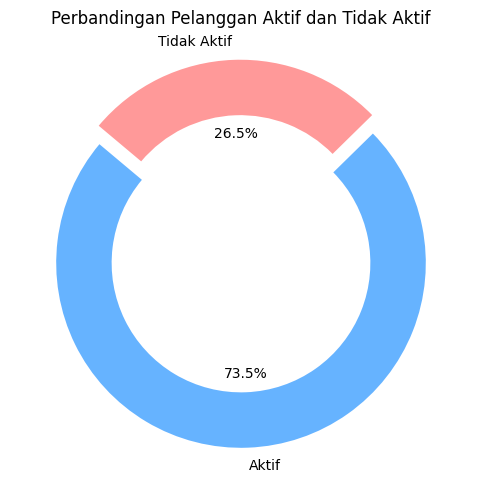

In [52]:
# Menghitung perbandingan pelanggan aktif dan tidak aktif
status = df_all['status'].value_counts()
print(status)
# Menghitung jumlah nilai pelanggan aktif (0) dan pelanggan yang berhenti (1)
count_0 = status[0]
count_1 = status[1]

# Label dan nilai untuk grafik pie
labels = ['Aktif', 'Tidak Aktif']
values = [count_0, count_1]
colors = ['#66b3ff','#ff9999']

# Membuat grafik donut
plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=(0, 0.1), wedgeprops=dict(width=0.3))

# Memberikan judul pada grafik
plt.title('Perbandingan Pelanggan Aktif dan Tidak Aktif')

# Menampilkan grafik donut
plt.show()

terlihat bahwa masih sebanyak `73.5%` pelanggan masih memutuskan untuk berlangganana dan ada sekitar `26.5%` lainnya yang memutuskan untuk tidak lagi berlangganan.

### Memeriksa kolom `numerik` dan `kategorik`

In [53]:
#menampilkan informasi data numerik
df_all.describe()

,monthlycharges,totalcharges,seniorcitizen,status,term,tenure
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,64.761692,2279.734304,0.162147,0.265370,985.996166,32.515547
std,30.090047,2266.794470,0.368612,0.441561,747.587844,24.782150
min,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.500000,398.550000,0.000000,0.000000,273.000000,9.000000
50%,70.350000,1394.550000,0.000000,0.000000,883.000000,29.000000
75%,89.850000,3786.600000,0.000000,1.000000,1676.000000,55.000000
max,118.750000,8684.800000,1.000000,1.000000,2191.000000,73.000000


kolom `term` dan `tenure` pada dasarnya sama, hanya saja `tenure` menggunakan kalkulasi bulan dan `term` menggunakan kalkulasi hari.

In [54]:
# melihat statistik deskriptif untuk data categorik
df_all.select_dtypes(exclude=['int','float','datetime']).describe()

,customerid,type,paperlessbilling,paymentmethod,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,gender,partner,dependents,multiplelines
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,3,2,4,3,2,2,2,2,2,2,2,2,2,2
top,4817-QRJSX,Month-to-month,Yes,Electronic check,Fiber optic,No,No,No,No,No,No,Male,No,No,No
freq,1,3875,4171,2365,3096,5024,4614,4621,4999,4336,4311,3555,3641,4933,4072


seperti yang telah kita lihat sebelumnya, kolom numerik ini memiliki kebanyakan indikator `yes` dan `no` sedangkan ada beberapa kolom yang memiliki variasi nilai lainnya seperti kolom `type`, `paymentmethod` dan `internetservice`

### Melihat korelasi kolom

untuk lebih memahami hubungan antar kolom masi kita buatkan tabel korelasinya

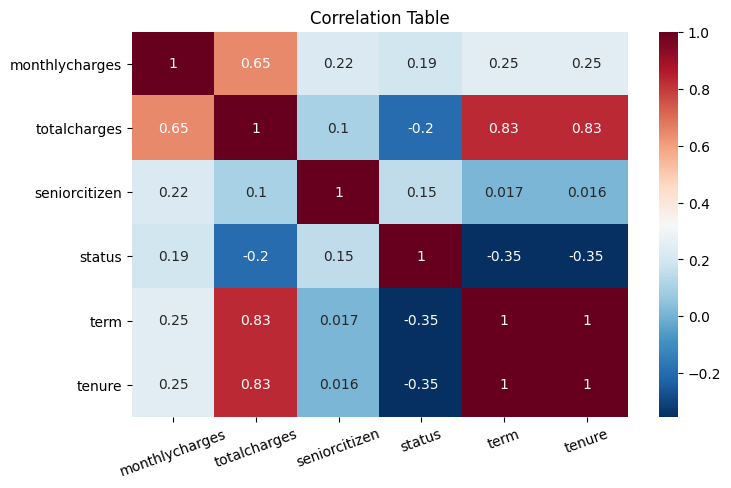

In [55]:
# mengecek korelasi pada dataset numerik
plt.figure(figsize=(8,5))
sns.heatmap(df_all.corr(),annot=True,cmap='RdBu_r')
plt.title('Correlation Table')
plt.xticks(rotation=20)
plt.show()

terlihat bahwa korelasi `totalcharges` dengan `monthlycharges` memiliki korelasi yang cukup tinggi, begitu pula dengan `totalcharges` dan `term/tenure` yang memiliki korelasi sangat tinggi. tentunya ini terjadi karena semakin banyak pembayaran `monthlycharges` mengartikan pelanggan semakin lama pula menggunakan provider ini `term/tenure` dan ini menybabkan `totalcharges` semakin besar pula.

sekarang mari kita periksa korelasi secara keseluruhan, dikarenakan tabel korelasi hanya akan mengeluarkan kolom dengan nilai `numerik` pertama kita akan menggunakan `encoder` untuk mengubahnya nilai `kategorik` menjadi `numerik`

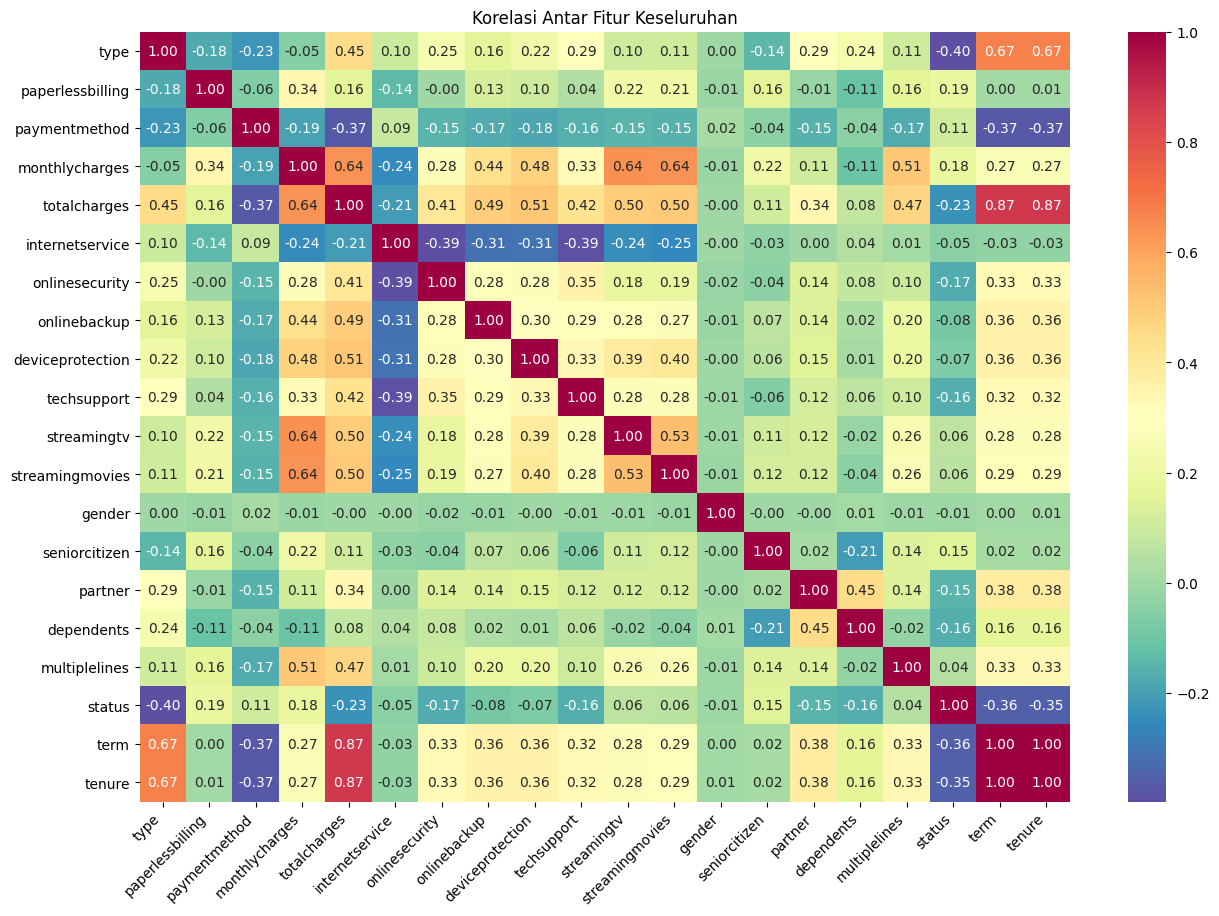

In [56]:
# Melihat hubungan masing-masing fitur dengan menggunakan fungsi korelasi dimulai dengan fitur pada kolom ketiga sampai 19
def correlation(data, title):
    encoder = OrdinalEncoder()
    columns_heatmap = data.columns[3:]
    data_ordinal = pd.DataFrame(encoder.fit_transform(data[columns_heatmap]),
                                columns=columns_heatmap)

    # Membuat matriks korelasi dengan heatmap
    plt.figure(figsize=(15,10))
    sns.heatmap(data_ordinal.corr(),
                annot=True,
                cmap='Spectral_r',
                fmt='.2f',
                linecolor='black')
    plt.xticks(rotation=45,
               ha='right')
    plt.title(title)
    plt.show()

#Menjalankan fungsi correlation
correlation(df_all,'Korelasi Antar Fitur Keseluruhan')

terlihat bahwa ada beberapa kolom tambahan dari sebelumnya yang memiliki korelasi cukup tinggi (>0.4)
1. kolom `type` ternyata berkorelasi cukup tinggi dengan kolom `term/tenure` (0.67)
2. kolom `monthlycharges` dan `totalcharges` memiliki berkorelasi positif dengan kolom penyedia layanan seperti `streamingtv`, `streamingmovies`, `onlinesecurity`, `onlinebackups`, `techsupport`, dan `multiplelines`
3. kolom `monthlycharges` dan `totalcharges` tidak terlalu dipengaruhi orang pribadi pengguna seperti `gender`, `seniorcitizen`, `partner` maupun `dependents`
4. kolom `status` berlangganan tidak dipengaruhi oleh jenis layanan, biaya layanan maupun data pribadi pelanggan.

### Membandingkan fitur kolom dengan `status`

sekarang mari kita bandingkan data klien yang masih berlangganan dan tidak berlangganan

In [57]:
# Split data into active clients and clients who have left
active_clients = df_all[df_all['status'] == 1]
left_clients = df_all[df_all['status'] == 0]

# Calculate statistics for MonthlyCharges
def calculate_statistics(df, column):
    return {
        'average': df[column].mean(),
        'minimum': df[column].min(),
        'maximum': df[column].max(),
        'median': df[column].median(),
        '25th_percentile': df[column].quantile(0.25),
        '75th_percentile': df[column].quantile(0.75)
    }

active_stats = calculate_statistics(active_clients, 'monthlycharges')
left_stats = calculate_statistics(left_clients, 'monthlycharges')

# Create a DataFrame to display statistics
stats_df = pd.DataFrame({
    'Statistic': ['Average', 'Minimum', 'Maximum', 'Median', '25th Percentile', '75th Percentile'],
    'Active Clients': [active_stats['average'], active_stats['minimum'], active_stats['maximum'], active_stats['median'], active_stats['25th_percentile'], active_stats['75th_percentile']],
    'Left Clients': [left_stats['average'], left_stats['minimum'], left_stats['maximum'], left_stats['median'], left_stats['25th_percentile'], left_stats['75th_percentile']]
})

# Print the DataFrame
print(stats_df)

         Statistic  Active Clients  Left Clients
0          Average       74.441332     61.265124
1          Minimum       18.850000     18.250000
2          Maximum      118.350000    118.750000
3           Median       79.650000     64.425000
4  25th Percentile       56.150000     25.100000
5  75th Percentile       94.200000     88.400000


terlihat bahwa pelanggan yang masih aktif memiiki rata-rata `monthlycharges` yang lebih besar dibandingkan dengan pelanggan yang sudah tidak berlangganan. untuk nilai maximum dan minimumnya terlihat sama.

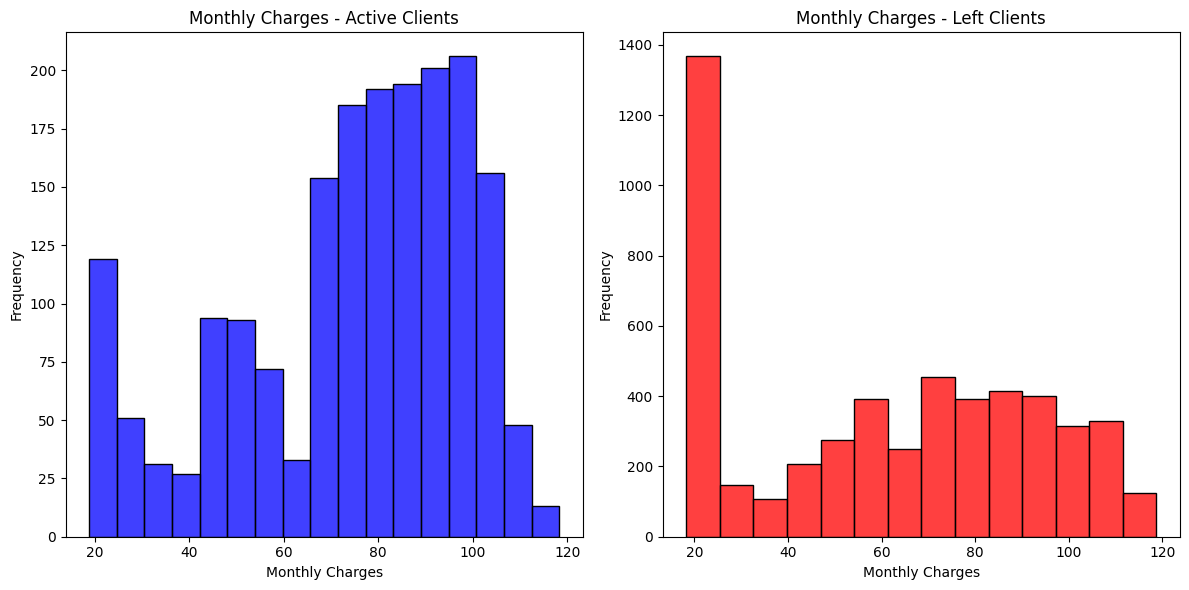

In [58]:
# Plot histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(active_clients['monthlycharges'], kde=False, color='blue')
plt.title('Monthly Charges - Active Clients')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(left_clients['monthlycharges'], kde=False, color='red')
plt.title('Monthly Charges - Left Clients')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

terlihat bahwa pelanggan yang masih berlangganan justru memiliki jumlah `monthlycharges` yang lebih besar sedangkan yang sudah tidak berlanganan kebanyakan tidak memiliki `monthlycharges` yang besar. berarti kemungkinan mereka beralih dikarenakan oleh biaya bulanan yang tinggi adalah kecil.

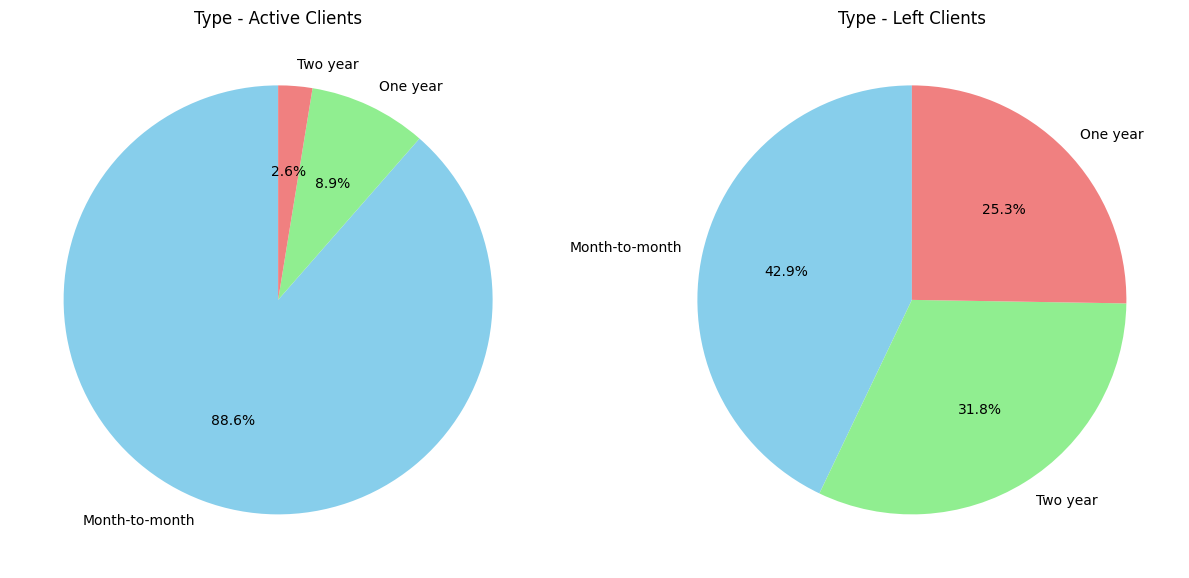

In [59]:
# Plot share of type
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
active_internet_share = active_clients['type'].value_counts(normalize=True) * 100
active_internet_share.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Type - Active Clients')
plt.ylabel('')

plt.subplot(1, 2, 2)
left_internet_share = left_clients['type'].value_counts(normalize=True) * 100
left_internet_share.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Type - Left Clients')
plt.ylabel('')

plt.tight_layout()
plt.show()

terlihat bahwa layanan dengan tipe `month-to-month` sangat banyak digunakan oleh pelanggan yang masih menggunakan provider ini, tipe dengan `two year` dan `one year` juga cukup banyak yang keluar hampir sebanding dengan pengguna tipe `month-to-month`.

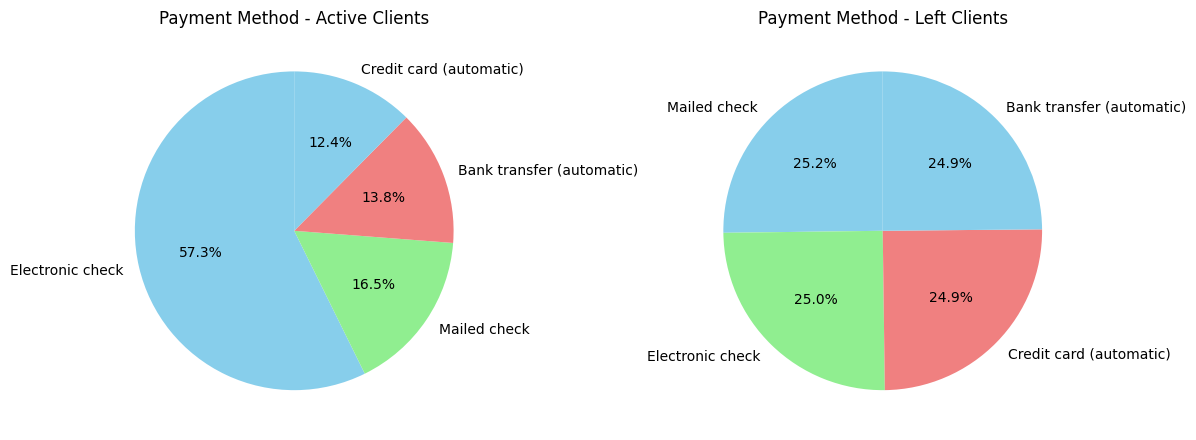

In [60]:
# Plot share of type
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
active_internet_share = active_clients['paymentmethod'].value_counts(normalize=True) * 100
active_internet_share.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Payment Method - Active Clients')
plt.ylabel('')

plt.subplot(1, 2, 2)
left_internet_share = left_clients['paymentmethod'].value_counts(normalize=True) * 100
left_internet_share.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Payment Method - Left Clients')
plt.ylabel('')

plt.tight_layout()
plt.show()

seperti yang sudah kita ketahui sebelumnya bahwa banyak pelanggan aktif lebih memilih menggunakan tipe layanan `month-to-month` dan banyak pelanggan dengan tipe layanan `one year` dan `two year` yang memilih untuk tidak melanjutkan berlangganan. ini kemungkinan dikarenakan oleh `paymentmethod` dibuktikan dengan cukup banyak pelanggan yang menggunakan metode pembayaran `automatic` yang memilih untuk berhenti berlangganan. 

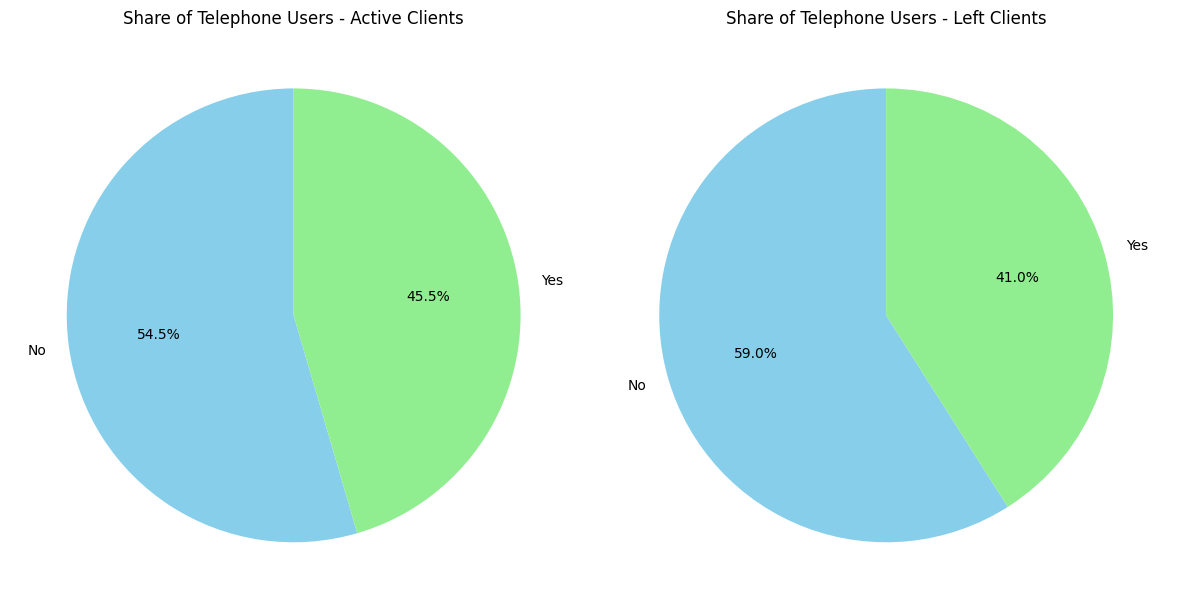

In [61]:
# Plot share of telephone users
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
active_phone_share = active_clients['multiplelines'].value_counts(normalize=True) * 100
active_phone_share.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Share of Telephone Users - Active Clients')
plt.ylabel('')

plt.subplot(1, 2, 2)
left_phone_share = left_clients['multiplelines'].value_counts(normalize=True) * 100
left_phone_share.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Share of Telephone Users - Left Clients')
plt.ylabel('')

plt.tight_layout()
plt.show()

terlihat bahwa pelanggan yang berlangganan dan tidak berlangganan tidak terlalu beda persentasenya untuk layanan `multiplelines` berarti layanan ini juga tidak terlalu berpengaruh terdahap tidak berlangganannya pelanggan

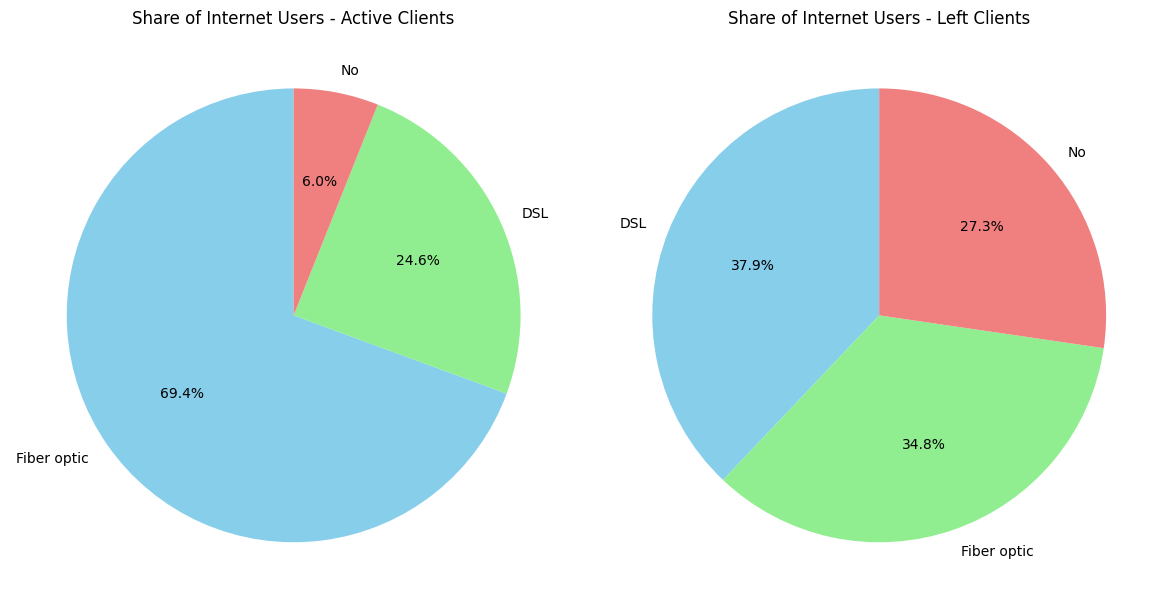

In [62]:
# Plot share of Internet users
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
active_internet_share = active_clients['internetservice'].value_counts(normalize=True) * 100
active_internet_share.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Share of Internet Users - Active Clients')
plt.ylabel('')

plt.subplot(1, 2, 2)
left_internet_share = left_clients['internetservice'].value_counts(normalize=True) * 100
left_internet_share.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Share of Internet Users - Left Clients')
plt.ylabel('')

plt.tight_layout()
plt.show()

terlihat bahwa ternyata kebanyakan pelanggan yang tidak melanjutkan berlangganan adalah mereka yang tidak menggunakan layanan internet, sementara pelanggan yang masih berlangganan kebanyakan menggunakan `fiber optic` sebagai jenis kabel untuk layanan internet mereka, dan sedikit sekali yang tidak menggunakan `internet`.

**Kesimpulan:** provider ini memiliki cukup banyak pelanggan setia yang masih menggunakan layanan selama lebih dari 5 tahun, ada jauh lebih banyak pelanggan yang masih menggunakan layanan ini sekitar `73.5%` pengguna. terlihat bahwa `status` langganan pelanggan tidak dipengaruhi oleh jenis layanan, biaya layanan maupun data pribadi pelanggan. pembayaran `monthlycharge` dan `totalcharges` tidak terlalu dipengaruhi oleh data pribadi pelanggan, akan tetapi dipengaruhi oleh jumlah layanan yang digunakan oleh pelanggan. terlihat bahwa penggan dengan pembayaran bulanan yang besar lebih banyak yang tetap bertahan pada provider ini sedangkan pelanggan dengan pembayaran kecil cenderung lebih banyak meninggalkan provider ini. pelanggan dengan tipe pembayaran `one year` dan `two year` lebih banyak meninggalkan provider ini, mungkin dikarenakan `payment method` yang digunakan. serta pelanggan tanpa pelayanan internet dan kabel `dsl` lebih banyak memilih untuk berhenti berlangganan provider ini.

## Melatih Model<a id='train'></a>

In [63]:
#memeriksa kolom
df_all.columns

Index(['customerid', 'begindate', 'enddate', 'type', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'gender', 'seniorcitizen', 'partner',
       'dependents', 'multiplelines', 'status', 'term', 'tenure'],
      dtype='object')

In [64]:
#memeriksa tipe data kolom
df_all.dtypes

customerid                  object
begindate           datetime64[ns]
enddate             datetime64[ns]
type                        object
paperlessbilling            object
paymentmethod               object
monthlycharges             float64
totalcharges               float64
internetservice             object
onlinesecurity              object
onlinebackup                object
deviceprotection            object
techsupport                 object
streamingtv                 object
streamingmovies             object
gender                      object
seniorcitizen                int64
partner                     object
dependents                  object
multiplelines               object
status                       int64
term                         int64
tenure                       int64
dtype: object

In [65]:
# Select features and target
features = df_all.drop(columns=['customerid', 'begindate', 'enddate', 'status'])
target = df_all['status']

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Identify categorical and numerical columns
categorical_cols = features.select_dtypes(include=['object']).columns.tolist()
numerical_cols = features.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


### Model Random Forrest

In [66]:
# Define the model
model1 = RandomForestClassifier(random_state=42)

# Create and evaluate the pipeline
clf1 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model1)])

# Define the parameter grid for hyperparameter tuning
rf_param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Grid Search with Cross-Validation
rf_grid_search = GridSearchCV(clf1, rf_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
rf_grid_search.fit(x_train, y_train)

# Best model
rf_best_model = rf_grid_search.best_estimator_

# Predict on test data
rf_y_pred = rf_best_model.predict(x_test)
rf_y_pred_proba = rf_best_model.predict_proba(x_test)[:, 1]

# Evaluation
rf_roc_auc = roc_auc_score(y_test, rf_y_pred_proba)
rf_accuracy = accuracy_score(y_test, rf_y_pred)

print("Classification Report:\n", classification_report(y_test, rf_y_pred))
print("AUC-ROC Score:", rf_roc_auc)
print("Accuracy:", rf_accuracy)

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      1036
           1       0.76      0.55      0.63       373

    accuracy                           0.83      1409
   macro avg       0.80      0.74      0.76      1409
weighted avg       0.83      0.83      0.82      1409

AUC-ROC Score: 0.8837183123376152
Accuracy: 0.8332150461320085


terlihat bahwa nilai `AUC-ROC` sudah mencapai nilai `0.88` dan `accuracy` mencapai nilai `0.83`.

### Model Logistic Regression

In [67]:
# Define the logistic regression model
model2 = LogisticRegression(random_state=42,max_iter=200)

# Create the pipeline
clf2 = Pipeline(steps=[('preprocessor', preprocessor),
                       ('model', model2)])

# Define parameter grid for hyperparameter tuning
logistic_param_grid = {
    'model__C': [0.1, 1, 10, 100]
}

# Grid Search with Cross-Validation
logis_grid_search = GridSearchCV(clf2, logistic_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
logis_grid_search.fit(x_train, y_train)

# Best model
logis_best_model = logis_grid_search.best_estimator_

# Predict on test data
logis_y_pred = logis_best_model.predict(x_test)
logis_y_pred_proba = logis_best_model.predict_proba(x_test)[:, 1]

# Evaluation
logis_roc_auc = roc_auc_score(y_test, logis_y_pred_proba)
logis_accuracy = accuracy_score(y_test, logis_y_pred)

print("Classification Report:\n", classification_report(y_test, logis_y_pred))
print("AUC-ROC Score:", logis_roc_auc)
print("Accuracy:", logis_accuracy)

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409

AUC-ROC Score: 0.8643356589067045
Accuracy: 0.8204400283889283


terlihat bahwa nilai `AUC-ROC` sudah mencapai nilai `0.86` dan `accuracy` mencapai nilai `0.82`.

### Model Gradient Boosting

In [68]:
# Define the Gradient Boosting model
model3 = GradientBoostingClassifier(random_state=42)

# Create the pipeline
clf3 = Pipeline(steps=[('preprocessor', preprocessor),
                         ('model', model3)])

# Define parameter grid for hyperparameter tuning
gb_param_grid = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 5, 7]
}

# Grid Search with Cross-Validation
gb_grid_search = GridSearchCV(clf3, gb_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
gb_grid_search.fit(x_train, y_train)

# Best model
gb_best_model = gb_grid_search.best_estimator_

# Predict on test data
gb_y_pred = gb_best_model.predict(x_test)
gb_y_pred_proba = gb_best_model.predict_proba(x_test)[:, 1]

# Evaluation
gb_roc_auc = roc_auc_score(y_test, gb_y_pred_proba)
gb_accuracy = accuracy_score(y_test, gb_y_pred)

print("Classification Report:\n", classification_report(y_test, gb_y_pred))
print("AUC-ROC Score:", gb_roc_auc)
print("Accuracy:", gb_accuracy)

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1036
           1       0.83      0.68      0.74       373

    accuracy                           0.88      1409
   macro avg       0.86      0.81      0.83      1409
weighted avg       0.87      0.88      0.87      1409

AUC-ROC Score: 0.9345194965168155
Accuracy: 0.8765081618168914


terlihat bahwa nilai `AUC-ROC` sudah mencapai nilai `0.93` dan `accuracy` mencapai nilai `0.87`.

### Model Support Vektor Machine

In [69]:
# Define the model
model4 = SVC(probability=True, random_state=42)

# Create and evaluate the pipeline
clf4 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model4)])

# Define the parameter grid for hyperparameter tuning
svm_param_grid = {
    'model__C': [0.1, 1, 10, 100],
    'model__gamma': [1, 0.1, 0.01, 0.001],
    'model__kernel': ['linear', 'rbf']
}

# Grid Search with Cross-Validation
svm_grid_search = GridSearchCV(clf4, svm_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
svm_grid_search.fit(x_train, y_train)

# Best model
svm_best_model = svm_grid_search.best_estimator_

# Predict on test data
svm_y_pred = svm_best_model.predict(x_test)
svm_y_pred_proba = svm_best_model.predict_proba(x_test)[:, 1]

# Evaluation
svm_roc_auc = roc_auc_score(y_test, svm_y_pred_proba)
svm_accuracy = accuracy_score(y_test, svm_y_pred)

print("Classification Report:\n", classification_report(y_test, svm_y_pred))
print("AUC-ROC Score:", svm_roc_auc)
print("Accuracy:", svm_accuracy)

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.59      0.64       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409

AUC-ROC Score: 0.8537903568064427
Accuracy: 0.8218594748048261


terlihat bahwa nilai `AUC-ROC` sudah mencapai nilai `0.85` dan `accuracy` mencapai nilai `0.82`.

### Model Artificial Neural Network

In [70]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

# Select features and target
features = df_all.drop(columns=['customerid', 'begindate', 'enddate', 'status'])
target = df_all['status']

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Identify categorical and numerical columns
categorical_cols = features.select_dtypes(include=['object']).columns.tolist()
numerical_cols = features.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply preprocessing to training data
x_train_processed = preprocessor.fit_transform(x_train)
x_test_processed = preprocessor.transform(x_test)

# Ensure the data types are compatible
x_train_processed = np.array(x_train_processed, dtype=np.float32)
x_test_processed = np.array(x_test_processed, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

# Define the ANN model
model5 = Sequential([
    Dense(64, activation='relu', input_shape=(x_train_processed.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model
model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'AUC'])

# Set up early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model5.fit(x_train_processed, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Predict on test data
ann_y_pred_proba = model5.predict(x_test_processed).flatten()
ann_y_pred = (ann_y_pred_proba > 0.5).astype(int)

# Evaluation
ann_roc_auc = roc_auc_score(y_test, ann_y_pred_proba)
ann_accuracy = accuracy_score(y_test, ann_y_pred)

print("Classification Report:\n", classification_report(y_test, ann_y_pred))
print("AUC-ROC Score:", ann_roc_auc)
print("Accuracy:", ann_accuracy)

2024-06-18 03:43:06.117345: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
141/141 [==============================] - 2s 6ms/step - loss: 0.5314 - accuracy: 0.7326 - auc: 0.7150 - val_loss: 0.4242 - val_accuracy: 0.7950 - val_auc: 0.8273
Epoch 2/100
141/141 [==============================] - 1s 4ms/step - loss: 0.4595 - accuracy: 0.7870 - auc: 0.8103 - val_loss: 0.4150 - val_accuracy: 0.8057 - val_auc: 0.8391
Epoch 3/100
141/141 [==============================] - 1s 4ms/step - loss: 0.4411 - accuracy: 0.7901 - auc: 0.8260 - val_loss: 0.4081 - val_accuracy: 0.8066 - val_auc: 0.8427
Epoch 4/100
141/141 [==============================] - 1s 4ms/step - loss: 0.4431 - accuracy: 0.7892 - auc: 0.8257 - val_loss: 0.4078 - val_accuracy: 0.8075 - val_auc: 0.8437
Epoch 5/100
141/141 [==============================] - 1s 4ms/step - loss: 0.4384 - accuracy: 0.7979 - auc: 0.8306 - val_loss: 0.4057 - val_accuracy: 0.8057 - val_auc: 0.8440
Epoch 6/100
141/141 [==============================] - 1s 4ms/step - loss: 0.4314 - accuracy: 0.7992 - auc: 0.8352 - val_loss

terlihat bahwa nilai `AUC-ROC` sudah mencapai nilai `0.85` dan `accuracy` mencapai nilai `0.81`.

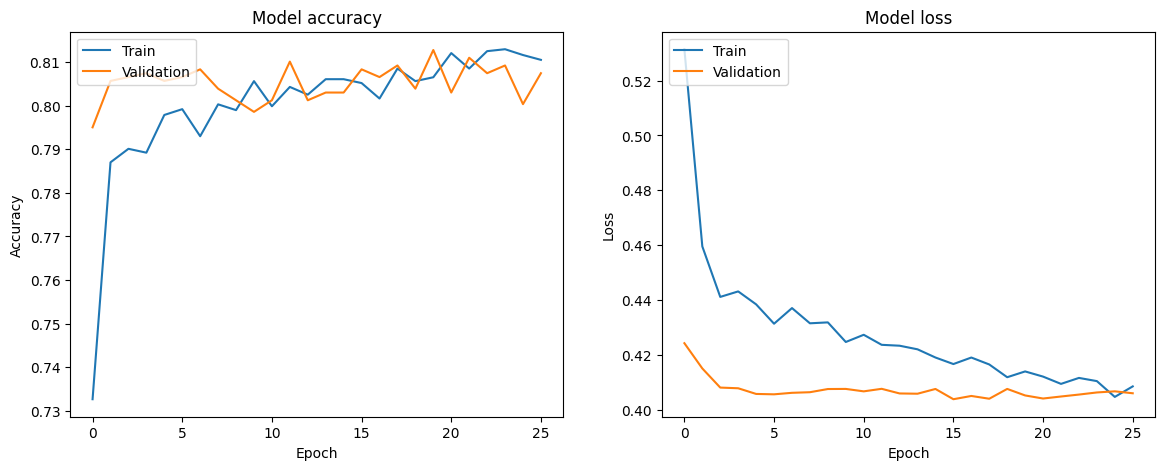

In [71]:
# Plotting the training history
plt.figure(figsize=(14, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

terlihat bahwa akurasi pada data pelatihan meningkat seiring waktu, itu menunjukkan bahwa model sedang belajar dengan baik, akan tetapi akurasi pada data validasi stagnan atau menurun setelah beberapa epoch, ini adalah tanda bahwa model mungkin mulai overfitting. grafik loss pada data pelatihan menurun seiring waktu, ini menunjukkan bahwa model sedang belajar dengan baik. loss pada data validasi mulai stagnan atau meningkat setelah beberapa epoch, ini adalah tanda bahwa model mungkin overfitting

### Komparasi model

Training Logistic Regression...


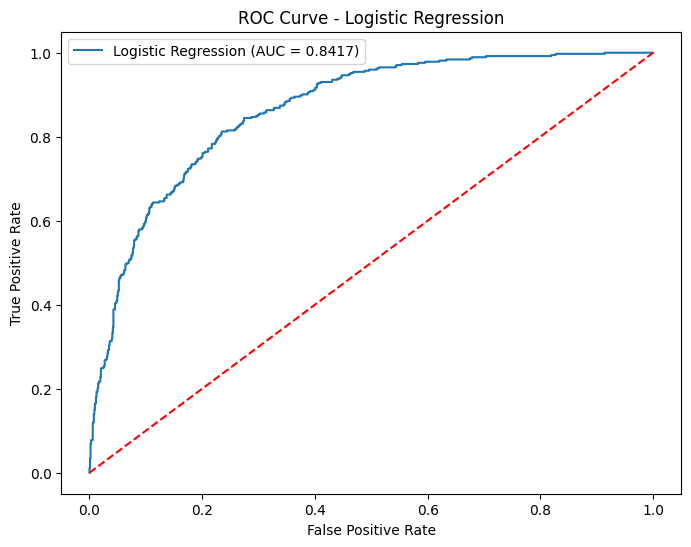

Training Random Forest...


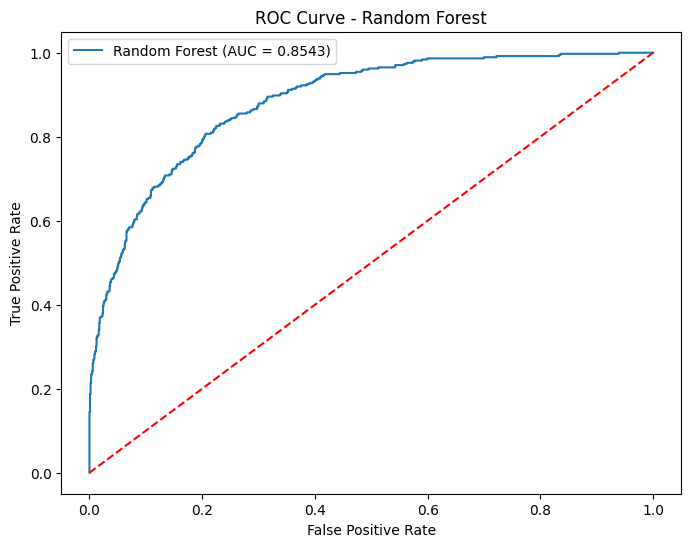

Training Gradient Boosting...


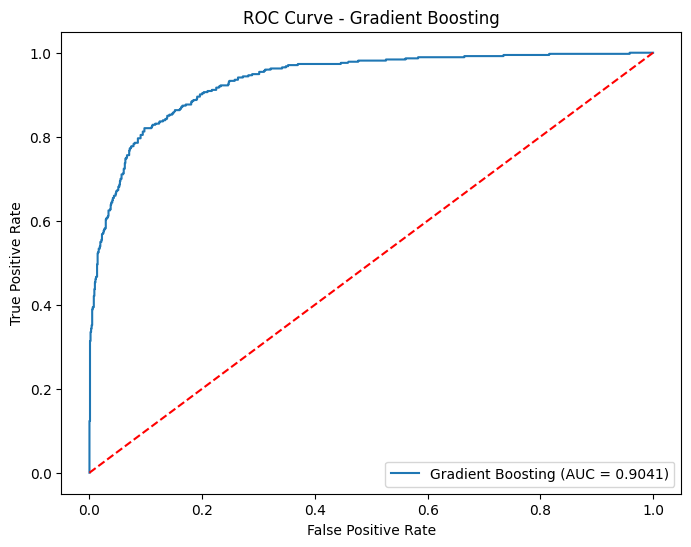

Training SVM...


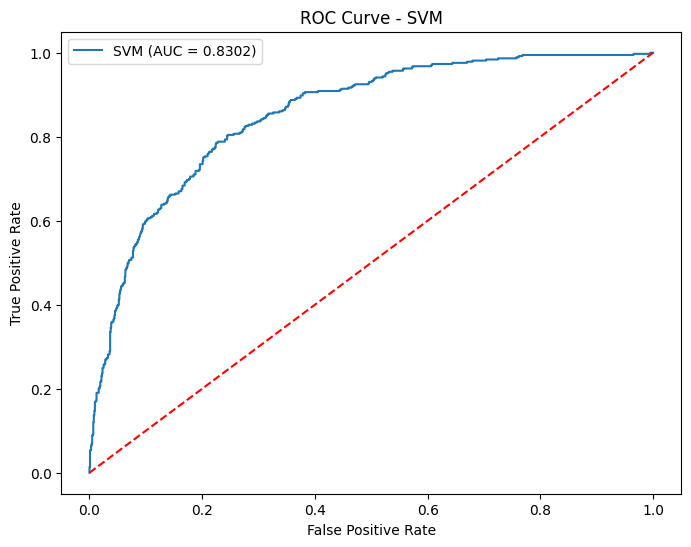

In [72]:
# Model yang telah di-tuning
models = {
    'Logistic Regression': logis_best_model,
    'Random Forest': rf_best_model,
    'Gradient Boosting': gb_best_model,
    'SVM': svm_best_model,
}

# Inisialisasi dictionary untuk menyimpan hasil
results = {}

# Melatih dan mengevaluasi setiap model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    y_pred = cross_val_predict(model, x_train, y_train, cv=5, method='predict_proba')[:, 1]
    roc_auc = roc_auc_score(y_train, y_pred)

    model.fit(x_train, y_train)
    y_test_pred = model.predict(x_test)
    y_test_pred_proba = model.predict_proba(x_test)[:, 1]

    accuracy = accuracy_score(y_test, y_test_pred)

    results[model_name] = {'accuracy': accuracy, 'roc_auc': roc_auc}

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.show()

terlihat bahwa keempat model yang dilatih menunjukkan performa yang sangat baik terlebih pada model `gradient boosting` yang semakin tinggi dan jauh dari garis-garis merah. model `ann` tidak bisa dilakukan plot ini karena penggunaan `tensor`.

In [73]:
# Menggabungkan hasil model
results = [
    {'Model': 'Random Forest', 'AUC-ROC': rf_roc_auc, 'Accuracy': rf_accuracy},
    {'Model': 'Logistic Regression', 'AUC-ROC': logis_roc_auc, 'Accuracy': logis_accuracy},
    {'Model': 'Gradient Boosting', 'AUC-ROC': gb_roc_auc, 'Accuracy': gb_accuracy},
    {'Model': 'SVM', 'AUC-ROC': svm_roc_auc, 'Accuracy': svm_accuracy},
    {'Model': 'ANN', 'AUC-ROC': ann_roc_auc, 'Accuracy': ann_accuracy}
]
# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Add SP column based on AUC-ROC criteria
def calculate_sp(auc_roc):
    if auc_roc < 0.75:
        return 0
    elif 0.75 <= auc_roc < 0.81:
        return 4
    elif 0.81 <= auc_roc < 0.85:
        return 4.5
    elif 0.85 <= auc_roc < 0.87:
        return 5
    elif 0.87 <= auc_roc < 0.88:
        return 5.5
    else:
        return 6

results_df['SP'] = results_df['AUC-ROC'].apply(calculate_sp)

# Display the final results
print(results_df)

                 Model   AUC-ROC  Accuracy  SP
0        Random Forest  0.883718  0.833215   6
1  Logistic Regression  0.864336  0.820440   5
2    Gradient Boosting  0.934519  0.876508   6
3                  SVM  0.853790  0.821859   5
4                  ANN  0.861318  0.816182   5


terlihat bahwa `gradient boosting` dan `random forest` memiliki nilai `AUC-ROC` DAN `Accuracy` yang sangat tinggi mencapai nilai SP=6, sementara 3 model lainnya yaitu model `Logistic Regression`, `SVM` dan `ANN` memiliki nilai SP=5 meskipun sudah cukup baik, tapi masih belum sebaik 2 model lainnya. urutan model dari yang terbaik `Gradient Boosting`>`Random Forest`>`Logistic Regression`>`Support Vektor Machine`>`Artificial Neural Network`

**Kesimpulan:** dataset telah dilatih menggunakan 5 model machine learning, terlihat bahwa kelima model menghasilkan nilai `AUC-ROC` dan `Accuracy` yang tinggi diatas 0.85. ini menunjukkan performa yang baik bagi semua model. tertutama pada model `gradient boosting` dan `random forest` yang mencapai nilai `SP=6`

## Kesimpulan<a id='conclusion'></a>

1. provider ini memiliki cukup banyak pelanggan setia yang masih menggunakan layanan selama lebih dari 5 tahun
2. pelanggan yang masih menggunakan layanan ini sekitar `73.5%` pengguna. 
3. terlihat bahwa `status` langganan pelanggan tidak dipengaruhi oleh jenis layanan, biaya layanan maupun data pribadi pelanggan
4. pembayaran `monthlycharge` dan `totalcharges` tidak terlalu dipengaruhi oleh data pribadi pelanggan, akan tetapi dipengaruhi oleh jumlah layanan yang digunakan oleh pelanggan.
5. pelanggan layanan ini lebih banyak menggunakan layanan entertainment daripada menggunakan perawatan dan pengamanan device.
6. terlihat bahwa penggan dengan pembayaran bulanan yang besar lebih banyak yang tetap bertahan pada provider ini sedangkan pelanggan dengan pembayaran kecil cenderung lebih banyak meninggalkan provider ini.
7. pelanggan dengan tipe pembayaran `one year` dan `two year` lebih banyak meninggalkan provider ini, mungkin dikarenakan `payment method` yang digunakan. 
8. pelanggan tanpa pelayanan internet dan kabel `dsl` lebih banyak memilih untuk berhenti berlangganan provider ini.
9. dataset telah dilatih menggunakan 5 model machine learning, terlihat bahwa kelima model menghasilkan nilai `AUC-ROC` dan `Accuracy` yang tinggi diatas 0.85. ini menunjukkan performa yang baik bagi semua model.
10. model `gradient boosting` dan `random forest` yang mencapai nilai `SP=6`, sementara 3 lainnya mencapai nilai `SP=5`
11. model terbaik yang didapatkan adalah model `gradient boosting` dengan `AUC-ROC` sebesar `0.93` dan `Accurasy` sebesar `0.87`

### Temuan<a id='end'></a>

dataset terdiri dari 4 dataset
1. dataset `contract` memiliki `7043` entry dan 8 kolom, terdapat tipe data `float`, `object` dan `datetime`. terdapat 2 kolom numerik `monthlycharges` dan `totalcharges`. kolom `enddate` masih memiliki tipe data yang salah.
2. dataset `personal` memiliki `7043` entry dan 5 kolom, terdapat tipe data `int` dan `object`. tipe data integer ini sebenarnya bisa diganti menjadi object, ataupun sebaliknya karena hanya mengandung 2 indikator yes dan no
3. dataset `internet` memiliki `5517` entry dan 8 kolom, terdapat tipe data `object`. ini sudah seragam karena mengandung nilai yes dan no
4. dataset `phone` memiliki `6361` entry dan 2 kolom, terdapat tipe data `object`. ini sudah seragam karena mengandung nilai yes dan no
5. kolom `enddate` dibiarkan memiliki variabel `No` untuk memudahkan pengelompokan pelanggan yang masih menggunakan provider dan tidak
6. perlu membuat kolom `tenure` / `term` untuk mempermudah analisa kita selanjutnya.
7. kelima model yang digunakan masing-masing memiliki waktu running yang cukup lama tertutama pada model `svm`
8. total waktu running keseluruhan model secara kalkulasi mencapai waktu 1 jam.

### Rekomendasi<a id='recom'></a>

**Rekomendasi Sementara:** sebelumnya kita sudah mengetahui bahwa terlihat cukup banyak peminat untuk layanan entertainment seperti `streamingtv` dan `streamingmovies` dibandingkan dengan pelayanan lainnya. untuk itu disarankan untuk membuat iklan yang lebih mengedepankan layanan ini tertutama untuk pengguna dengan usia produktif (tidak senior). serta lebih menggencarkan promosi tipe layanan `month-to-month` yang memiliki lebih banyak pelanggan dibandingkan yang lainnya. 

selanjutnya untuk melanjutkan ini menggunakan model `machine learning` dalam upaya untuk mengetahui `churn` pelanggan adalah dengan melakukan
1. Modeling:
    * Bagi data menjadi set pelatihan dan set pengujian.
    * Pilih beberapa algoritma machine learning untuk percobaan awal (misalnya, Logistic Regression, Decision Trees, Random Forest, Gradient Boosting, dan k-NN).
    * Latih model menggunakan set pelatihan dan validasi menggunakan set pengujian.
    * Gunakan teknik cross-validation untuk mendapatkan estimasi performa yang lebih andal.
2. Evaluation:
    * Evaluasi model menggunakan metrik seperti akurasi, precision, recall, F1-score, dan AUC-ROC.
    * Pilih model terbaik berdasarkan performa pada metrik-metrik tersebut.
3. Hyperparameter Tuning:
    * Lakukan tuning hyperparameter pada model terbaik menggunakan Grid Search atau Random Search untuk meningkatkan performa.
4. Deployment:
    * Setelah model terbaik ditemukan dan di-tuning, model tersebut bisa di-deploy untuk prediksi churn pada data baru.
    * Implementasi model dalam sistem produksi dan monitor performanya secara berkala.
    
Dengan langkah-langkah ini, diharapkan dapat membangun model machine learning yang efektif untuk memprediksi churn pelanggan dan mengambil tindakan yang sesuai untuk meningkatkan retensi pelanggan.

**Rekomendasi Lanjutan:** sebelumnya kita sudah mengetahui bahwa proses lanjutan yang harus dilakukan adalah `modeling`, `evaluation` dan `hiperparameter tuning`, pada subbab [Melatih Model](#train) sudah dilakukan ketiga tahap tersebut terhadap 5 model `machine learning`: `random forest`, `logistic regression`, `gradient boosting`, `support Vektor Machine(svm)` dan `Artificial Neural Network(ANN)`. kelima model ini terbukti sangat efektif untuk memprediksi `churn` pelanggan. Model terbaik yang bisa digunakan adalan `gradient boosting` karena terbukti paling efektif dengan nilai `AUC-ROC` dan `Accuracy` yang sangat tinggi dibandingkan dengan 4 model lainnya. jadi disarankan untuk menggunakan model ini untuk proses selanjutnya dan mencari nilai `churn` pelanggan. model lainnya yang bisa dipertimbangkan adalah model `random forest` karena sudah cukup baik tapi belum sebaik model `gradient boosting`.

urutan model dari yang terbaik `Gradient Boosting`>`Random Forest`>`Logistic Regression`>`Support Vektor Machine`>`Artificial Neural Network`

[Kembali](#back)